In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn import preprocessing
from sklearn import model_selection

In [2]:
df = pd.read_csv('C:/Users/Эдуард/Desktop/fipe_2022.csv')

In [3]:
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


In [5]:
df.describe()

,year_of_reference,engine_size,year_model,avg_price_brl,age_years
count,290275.0,290275.000000,290275.000000,2.902750e+05,290275.000000
mean,2022.0,2.266047,2008.896633,1.220872e+05,14.103367
std,0.0,1.033109,9.263619,3.219139e+05,9.263619
min,2022.0,0.700000,1985.000000,1.831000e+03,0.000000
25%,2022.0,1.600000,2001.000000,2.187500e+04,7.000000
50%,2022.0,2.000000,2010.000000,4.683600e+04,13.000000
75%,2022.0,2.800000,2016.000000,1.061650e+05,22.000000
max,2022.0,6.700000,2023.000000,8.600000e+06,38.000000


In [6]:
df['brand'].unique()

array(['Acura', 'Agrale', 'Alfa Romeo', 'AM Gen', 'Asia Motors',
       'ASTON MARTIN', 'Audi', 'Baby', 'BMW', 'BRM', 'CAB Motors',
       'Cadillac', 'CBT Jipe', 'CHANA', 'CHANGAN', 'Caoa Chery',
       'GM - Chevrolet', 'Chrysler', 'Citroën', 'Cross Lander', 'Daewoo',
       'Daihatsu', 'Dodge', 'EFFA', 'Engesa', 'Envemo', 'Ferrari', 'Fiat',
       'Fibravan', 'Ford', 'FOTON', 'Fyber', 'GEELY', 'GREAT WALL',
       'HAFEI', 'Honda', 'Hyundai', 'Isuzu', 'IVECO', 'JAC', 'Jaguar',
       'Jeep', 'JINBEI', 'JPX', 'Kia Motors', 'Lada', 'Land Rover',
       'Lexus', 'LIFAN', 'LOBINI', 'Lotus', 'Mahindra', 'Maserati',
       'Matra', 'Mazda', 'Mclaren', 'Mercedes-Benz', 'Mercury', 'MG',
       'MINI', 'Mitsubishi', 'Nissan', 'Peugeot', 'Plymouth', 'Pontiac',
       'Porsche', 'RAM', 'RELY', 'Renault', 'Rolls-Royce', 'Rover',
       'Saab', 'Saturn', 'Seat', 'SHINERAY', 'smart', 'SSANGYONG',
       'Subaru', 'Suzuki', 'TAC', 'Toyota', 'Troller', 'VW - VolksWagen',
       'Volvo', 'Wake', 'Wa

In [7]:
df['fuel'].unique()

array(['Gasoline', 'Diesel', 'Alcohol'], dtype=object)

In [8]:
df['gear'].unique()

array(['manual', 'automatic'], dtype=object)

In [9]:
df['model'].unique()

array(['NSX 3.0', 'Legend 3.2/3.5', 'Integra GS 1.8', ...,
       'C-200 AMG Line EQ Boost 1.5 TB (Hib.)',
       'CLASSIC LARAMIE 5.7 CD V8 4X4 Aut.',
       'CLASSIC LARAMIE NIGHT ED. 5.7 4X4 Aut.'], dtype=object)

In [10]:
df['month_of_reference'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

<AxesSubplot:>

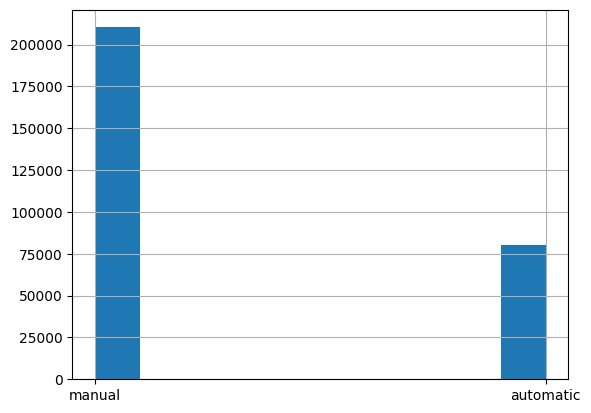

In [11]:
df['gear'].hist()

<AxesSubplot:>

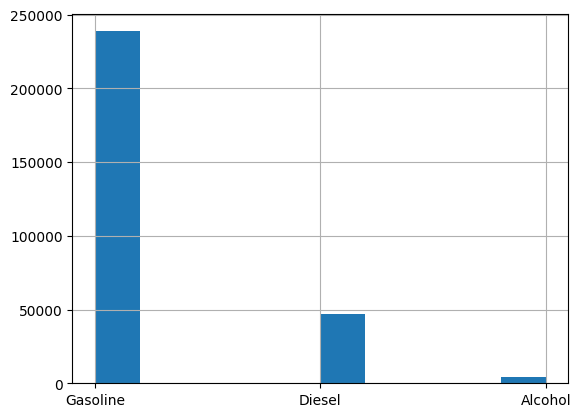

In [12]:
df['fuel'].hist()

In [13]:
df[df['fuel'] == 'Alcohol']

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
2319,2022,January,004001-0,gvx412fg8v0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000,11992.0,23
2371,2022,January,004010-0,g3f4kq04zlv4,GM - Chevrolet,Omega GLS 2.2 / 2.0,Alcohol,manual,2.2,1995,12633.0,28
2437,2022,January,004023-1,j1zcqbh9350,GM - Chevrolet,A-20 Custom/ C-20 S 4.1,Alcohol,manual,4.1,1996,17795.0,27
2439,2022,January,004023-1,jzlldlbbpd0,GM - Chevrolet,A-20 Custom/ C-20 S 4.1,Alcohol,manual,4.1,1995,17592.0,28
2451,2022,January,004024-0,j56k9k9trt0,GM - Chevrolet,A-20 Custom/ C-20 Luxe 4.1,Alcohol,manual,4.1,1996,18156.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
288349,2022,December,005182-9,hpypw2c6frnp,VW - VolksWagen,Gol City 1.6 Mi 8V 4p,Alcohol,manual,1.6,2003,14211.0,20
288351,2022,December,005182-9,gc053v8gmvkg,VW - VolksWagen,Gol City 1.6 Mi 8V 4p,Alcohol,manual,1.6,2002,10721.0,21
288377,2022,December,005189-6,g6scn6tgd5rx,VW - VolksWagen,Gol Special 1.0 Mi 4p,Alcohol,manual,1.0,2004,12917.0,19
288379,2022,December,005189-6,g1zp7t1yq6np,VW - VolksWagen,Gol Special 1.0 Mi 4p,Alcohol,manual,1.0,2003,12508.0,20


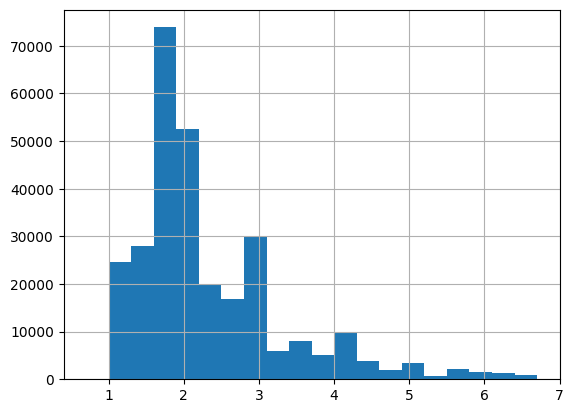

In [14]:
df['engine_size'].hist(bins=20)
plt.ticklabel_format(style='sci', axis='x', scilimits=(-5, 5))

<AxesSubplot:>

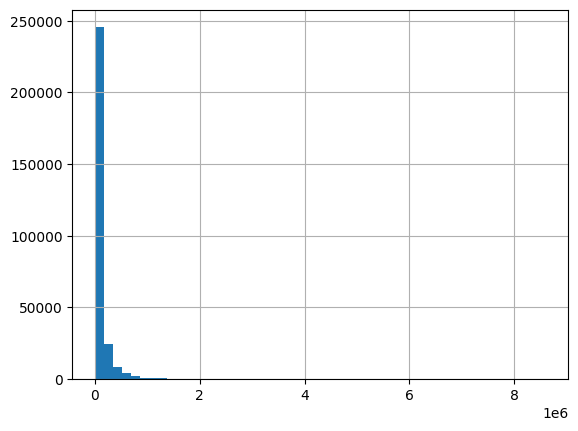

In [15]:
df['avg_price_brl'].hist(bins=50)

<AxesSubplot:>

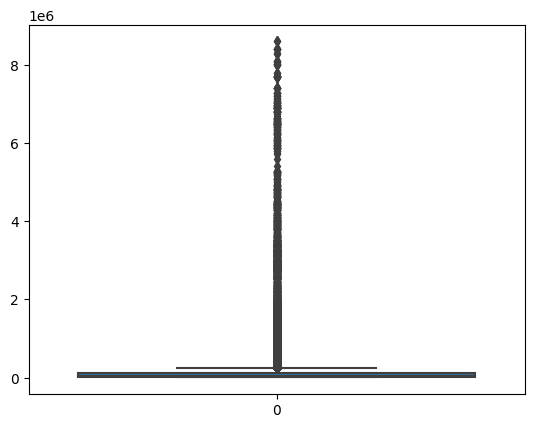

In [16]:
sns.boxplot(df['avg_price_brl'])

In [17]:
df['avg_price_brl'].quantile(0.9)

255001.00000000003

<AxesSubplot:>

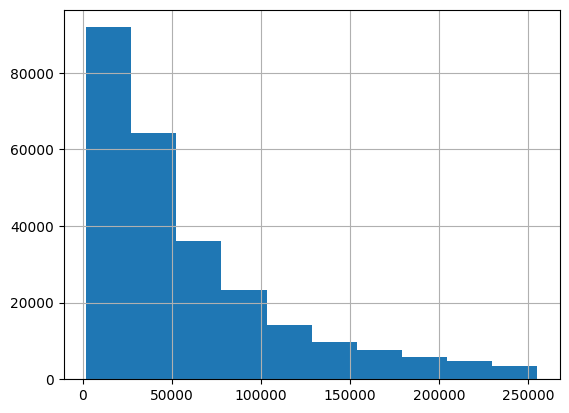

In [18]:
df[df['avg_price_brl'] < 255001.00000000003]['avg_price_brl'].hist()

<AxesSubplot:>

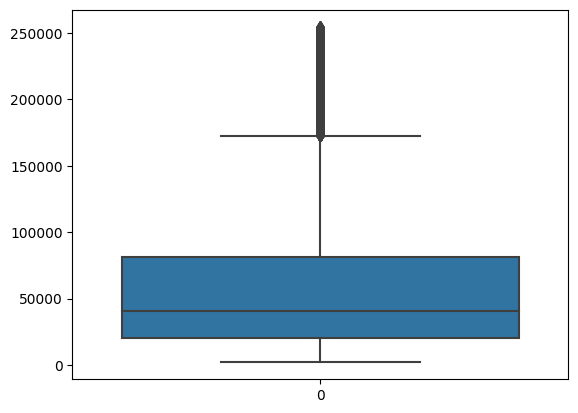

In [19]:
sns.boxplot(data = df[df['avg_price_brl'] < 255001.00000000003]['avg_price_brl'])

<AxesSubplot:>

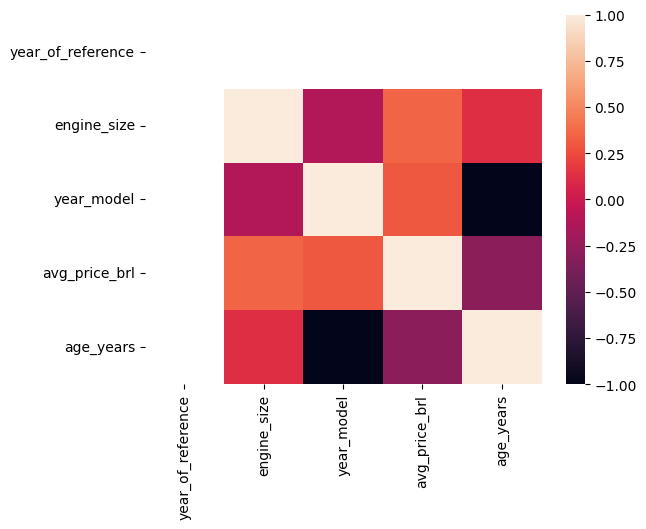

In [20]:
sns.heatmap(df.corr())

C:\Users\Эдуард\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 2022.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\Эдуард\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 2022.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Эдуард\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 2022.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


array([[<AxesSubplot:xlabel='year_of_reference', ylabel='year_of_reference'>,
        <AxesSubplot:xlabel='engine_size', ylabel='year_of_reference'>,
        <AxesSubplot:xlabel='year_model', ylabel='year_of_reference'>,
        <AxesSubplot:xlabel='avg_price_brl', ylabel='year_of_reference'>,
        <AxesSubplot:xlabel='age_years', ylabel='year_of_reference'>],
       [<AxesSubplot:xlabel='year_of_reference', ylabel='engine_size'>,
        <AxesSubplot:xlabel='engine_size', ylabel='engine_size'>,
        <AxesSubplot:xlabel='year_model', ylabel='engine_size'>,
        <AxesSubplot:xlabel='avg_price_brl', ylabel='engine_size'>,
        <AxesSubplot:xlabel='age_years', ylabel='engine_size'>],
       [<AxesSubplot:xlabel='year_of_reference', ylabel='year_model'>,
        <AxesSubplot:xlabel='engine_size', ylabel='year_model'>,
        <AxesSubplot:xlabel='year_model', ylabel='year_model'>,
        <AxesSubplot:xlabel='avg_price_brl', ylabel='year_model'>,
        <AxesSubplot:xlabel='ag

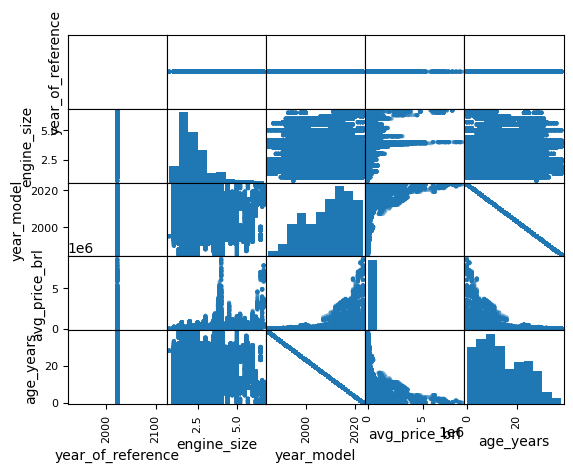

In [21]:
pd.plotting.scatter_matrix(df)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

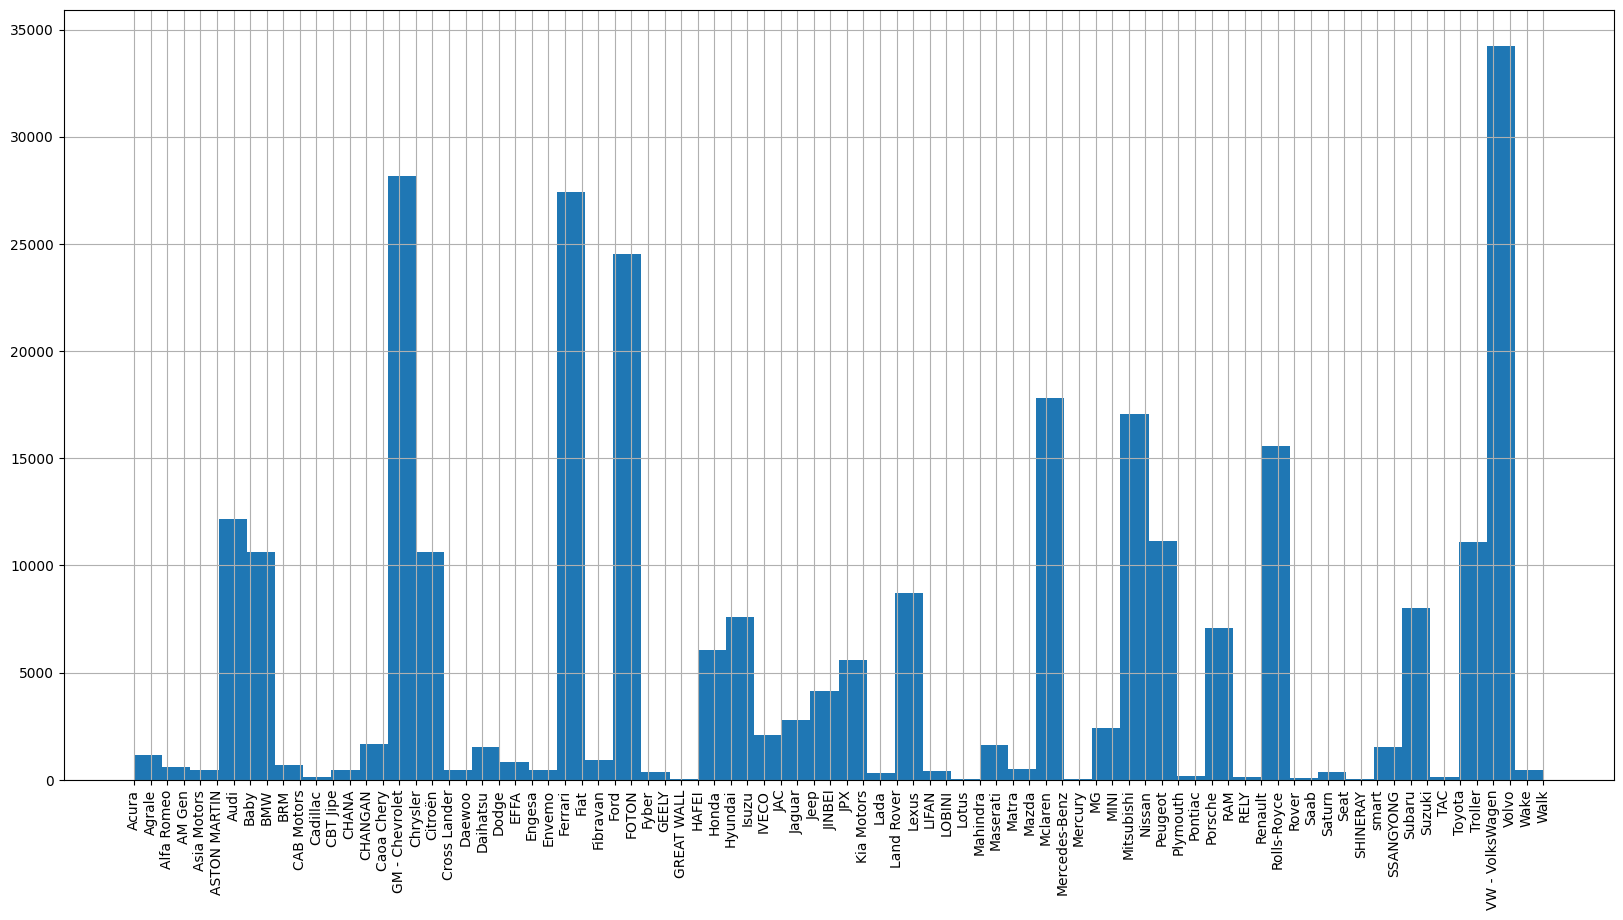

In [22]:
df['brand'].hist(bins=50, figsize=(20, 10))
plt.xticks(rotation=90)


# Гипотезы

H0 - цены на машины с коробкой автомат и механика одиннаковы
H1 - цены на машины с коробкой автомат и механика различаются


In [23]:
df[df['gear'] == 'manual']['avg_price_brl'].quantile(0.9)

211183.0

In [24]:
manual = df[df['gear'] == 'manual']

<AxesSubplot:>

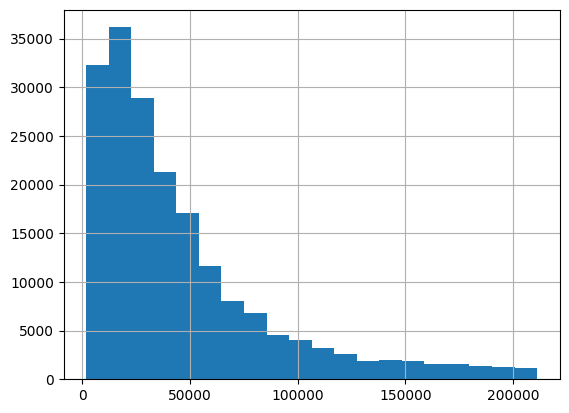

In [25]:
manual[manual['avg_price_brl'] < 211183.0]['avg_price_brl'].hist(bins=20)

In [26]:
df[df['gear'] == 'automatic']['avg_price_brl'].quantile(0.9)

328023.79999999993

In [27]:
automatic = df[df['gear'] == 'automatic']

<AxesSubplot:>

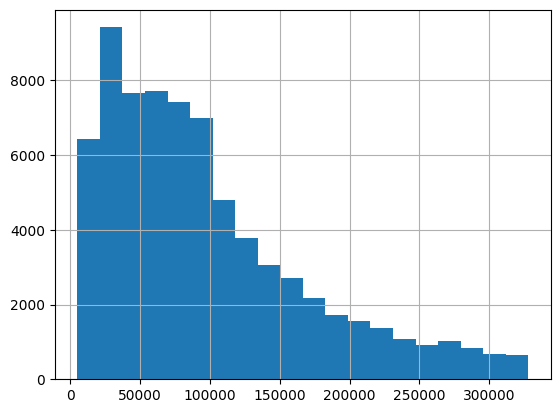

In [28]:
automatic[automatic['avg_price_brl'] < 328023.79999999993]['avg_price_brl'].hist(bins=20)

In [29]:
aut = automatic[automatic['avg_price_brl'] < 328023.79999999993]['avg_price_brl']
man = manual[manual['avg_price_brl'] < 211183.0]['avg_price_brl']

<AxesSubplot:xlabel='gear', ylabel='avg_price_brl'>

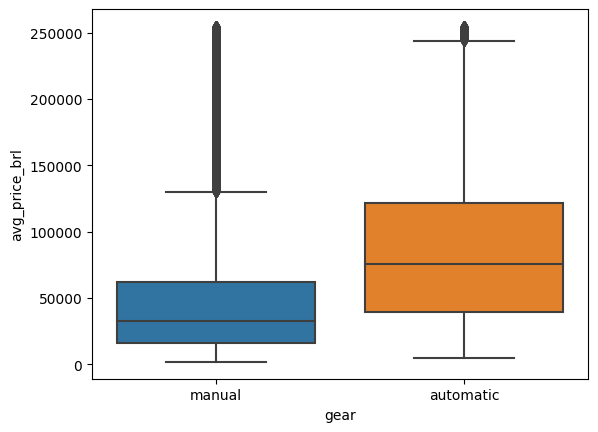

In [30]:
sns.boxplot(x='gear', y='avg_price_brl', data=df[df['avg_price_brl'] < 255001.00000000003])


In [31]:
aut.mean()

97752.09332499826

In [32]:
man.mean()

46117.521222016156

In [33]:
stats.mannwhitneyu(man[0:100], aut[0:100])

MannwhitneyuResult(statistic=6333.0, pvalue=0.001130671217669364)

# Оброботка данных перед обучением модели

In [34]:
df_copy = df.copy()

In [35]:
df_copy.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


In [36]:
df_copy = df_copy.drop(['year_of_reference', 'month_of_reference', 'fipe_code', 'authentication', 'brand', 'model', 'year_model'], axis=1)

In [37]:
df_copy.head()

,fuel,gear,engine_size,avg_price_brl,age_years
0,Gasoline,manual,3.0,43779.0,28
1,Gasoline,manual,3.0,42244.0,29
2,Gasoline,manual,3.0,40841.0,30
3,Gasoline,manual,3.0,39028.0,31
4,Gasoline,manual,3.0,35678.0,32


In [38]:
data = df_copy[df_copy['avg_price_brl'] < 255001.00000000003]

In [39]:
data = pd.get_dummies(data)

In [40]:
data.head()

,engine_size,avg_price_brl,age_years,fuel_Alcohol,fuel_Diesel,fuel_Gasoline,gear_automatic,gear_manual
0,3.0,43779.0,28,0,0,1,0,1
1,3.0,42244.0,29,0,0,1,0,1
2,3.0,40841.0,30,0,0,1,0,1
3,3.0,39028.0,31,0,0,1,0,1
4,3.0,35678.0,32,0,0,1,0,1


In [41]:
data_1 = data.copy()

In [42]:
X = data_1.drop('avg_price_brl', axis=1)
Y = data_1['avg_price_brl']

In [43]:
scaler_x = preprocessing.StandardScaler()
scaler_y = preprocessing.StandardScaler()

X = scaler_x.fit_transform(X)
Y = scaler_y.fit_transform(Y.values.reshape(-1, 1))

In [44]:
Y = Y.reshape(-1)

In [45]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.33, random_state=42)

# Cоздание модели(Нейросеть многослойный перцептрон)

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_dim=7, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(loss='MeanSquaredError', optimizer=tf.keras.optimizers.Adam(), metrics=['MeanAbsoluteError'])

In [47]:
model.fit(x_train, y_train, batch_size=50, epochs=15)

Epoch 1/15
3501/3501 [==============================] - 4s 1ms/step - loss: 0.2929 - mean_absolute_error: 0.3381
Epoch 2/15
3501/3501 [==============================] - 3s 939us/step - loss: 0.2282 - mean_absolute_error: 0.2930
Epoch 3/15
3501/3501 [==============================] - 3s 956us/step - loss: 0.2237 - mean_absolute_error: 0.2886
Epoch 4/15
3501/3501 [==============================] - 3s 954us/step - loss: 0.2214 - mean_absolute_error: 0.2866
Epoch 5/15
3501/3501 [==============================] - 3s 958us/step - loss: 0.2188 - mean_absolute_error: 0.2842
Epoch 6/15
3501/3501 [==============================] - 3s 926us/step - loss: 0.2164 - mean_absolute_error: 0.2824
Epoch 7/15
3501/3501 [==============================] - 3s 987us/step - loss: 0.2146 - mean_absolute_error: 0.2811
Epoch 8/15
3501/3501 [==============================] - 3s 981us/step - loss: 0.2137 - mean_absolute_error: 0.2803
Epoch 9/15
3501/3501 [==============================] - 3s 930us/step - loss: 0.21

In [48]:
y_train[0]

2.697862019522105

In [49]:
model.predict(x_train[0:1])

1/1 [==============================] - 0s 213ms/step


array([[2.5972083]], dtype=float32)

In [50]:
def train_test_error(x_train, y_train, x_test, y_test, model):
    x = []
    y = []
    for i in range(int(len(x_test)/3501)):
        x.append(i)
        y.append(tf.reduce_mean(abs(model.predict(x_train[i:i+3501]).reshape(-1) - y_train[i:i+3501]), 0))
    
    x1 = []
    y1 = []
    for i in range(int(len(x_test)/3501)):
        x1.append(i)
        y1.append(tf.reduce_mean(abs(model.predict(x_test[i:i+3501]).reshape(-1) - y_test[i:i+3501]), 0))
        
    plt.plot(x, y)
    plt.plot(x1, y1, color='green')
    plt.xlabel('N')
    plt.ylabel('Absolute Error')
    plt.legend(['train', 'test'])
    plt.show()
    

In [51]:
tf.reduce_mean(abs(model.predict(x_train[0:3501]).reshape(-1) - y_train[0:3501]), 0)

110/110 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(), dtype=float64, numpy=0.27071367265238366>

110/110 [==============================] - 0s 869us/step


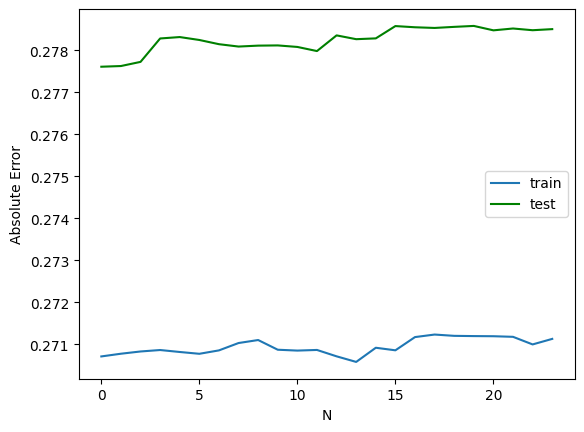

In [52]:
train_test_error(x_train, y_train, x_test, y_test, model)

Регуляризациионная модель

In [53]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_dim=7, activation='relu', activity_regularizer=tf.keras.regularizers.L1(0.5)),
    tf.keras.layers.Dense(10, activation='relu', activity_regularizer=tf.keras.regularizers.L1L2(l1=0.5, l2=0.1)),
    tf.keras.layers.Dense(1),
])

model1.compile(loss='MeanSquaredError', optimizer=tf.keras.optimizers.Adam(), metrics=['MeanAbsoluteError'])

In [54]:
model1.fit(x_train, y_train, batch_size=50, epochs=15)

Epoch 1/15
3501/3501 [==============================] - 4s 1ms/step - loss: 0.8169 - mean_absolute_error: 0.5102
Epoch 2/15
3501/3501 [==============================] - 3s 991us/step - loss: 0.4303 - mean_absolute_error: 0.3745
Epoch 3/15
3501/3501 [==============================] - 3s 989us/step - loss: 0.3904 - mean_absolute_error: 0.3635
Epoch 4/15
3501/3501 [==============================] - 4s 1ms/step - loss: 0.3720 - mean_absolute_error: 0.3602
Epoch 5/15
3501/3501 [==============================] - 4s 1ms/step - loss: 0.3624 - mean_absolute_error: 0.3592
Epoch 6/15
3501/3501 [==============================] - 4s 1ms/step - loss: 0.3553 - mean_absolute_error: 0.3579
Epoch 7/15
3501/3501 [==============================] - 3s 993us/step - loss: 0.3509 - mean_absolute_error: 0.3578
Epoch 8/15
3501/3501 [==============================] - 3s 994us/step - loss: 0.3481 - mean_absolute_error: 0.3575
Epoch 9/15
3501/3501 [==============================] - 3s 975us/step - loss: 0.3446 - m

110/110 [==============================] - 0s 924us/step


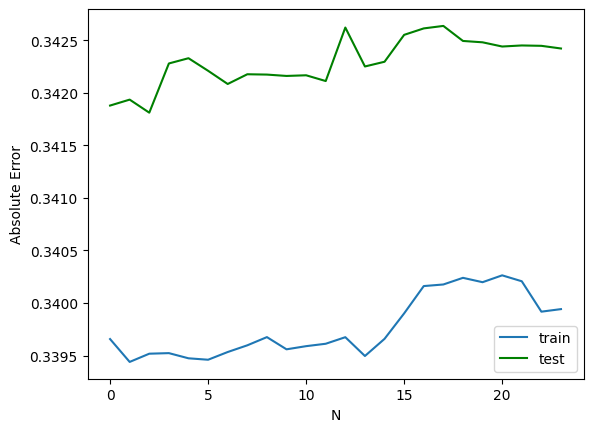

In [55]:
train_test_error(x_train, y_train, x_test, y_test, model1)

В принципе сильного переобучения нет, улучшить с помощью регуляризации не получилось

In [56]:
y_train[0]

2.697862019522105

In [57]:
model.predict(x_train[0:1])

1/1 [==============================] - 0s 16ms/step


array([[2.5972083]], dtype=float32)

In [60]:
scaler_y.inverse_transform(y_train[0].reshape(-1, 1))

array([[206111.]])

In [61]:
scaler_y.inverse_transform(model.predict(x_train[0:1]))

1/1 [==============================] - 0s 18ms/step


array([[200642.9]], dtype=float32)

In [62]:
scaler_y.inverse_transform(y_test[0].reshape(-1, 1))

array([[30453.]])

In [63]:
scaler_y.inverse_transform(model.predict(x_test[0:1]))

1/1 [==============================] - 0s 16ms/step


array([[27766.057]], dtype=float32)